# Spaceship Titanic Kaggle Challenge

## 1. Import dependencies and load data

### 1.1 Install dependencies

In [1]:
%%capture

! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install missingno


# this code is only necessary for Mac M1 Chip
! pip install tensorflow-macos
! pip install tensorflow-metal

### 1.2 Import dependencies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import seaborn as sns
import missingno as msno

### 1.3 Load the data

In [45]:
train = pd.read_csv("./spaceship-titanic/train.csv")
test = pd.read_csv("./spaceship-titanic/test.csv")

## 2. Analyze the dataset

### 2.1 Description of the dataset

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
6. **Age** - The age of the passenger.
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
9. **RoomService** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **FoodCourt** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **ShoppingMall** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **Spa** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
10. **Name** - The first and last names of the passenger.
11. **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
---
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. Same columns as train.csv.


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Show description of all numeric features
train.describe(include=float).applymap(lambda x: f"{x:0.2f}") # Round to 2 decimals

# Interesting: .applymap() applies function elementwise, so to every element of DF

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [7]:
# Show all categorical and boolean features
train.describe(include=[object, bool])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


### 2.3 Check for NaN-values

In [132]:
print(f"Number of rows:                      {len(train)}")
print(f"Number of rows with >= 1 NaN-value:  {(train.isna().any(1).sum())}")
print(f"\nPercentage of 'full'-rows:           {(train.isna().any(1).sum()/len(train))*100:.2f}%")

Number of rows:                      8693
Number of rows with >= 1 NaN-value:  2087

Percentage of 'full'-rows:           24.01%


<AxesSubplot:>

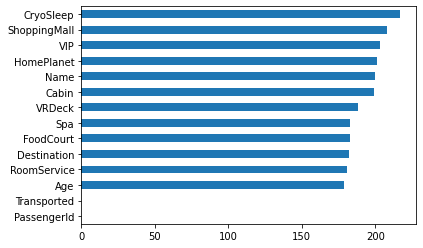

In [9]:
train.isna().sum().sort_values().plot(kind="barh")
# All columns show more or less equal amounts of NaN values - besides Target variable and PassengerID which are 100%

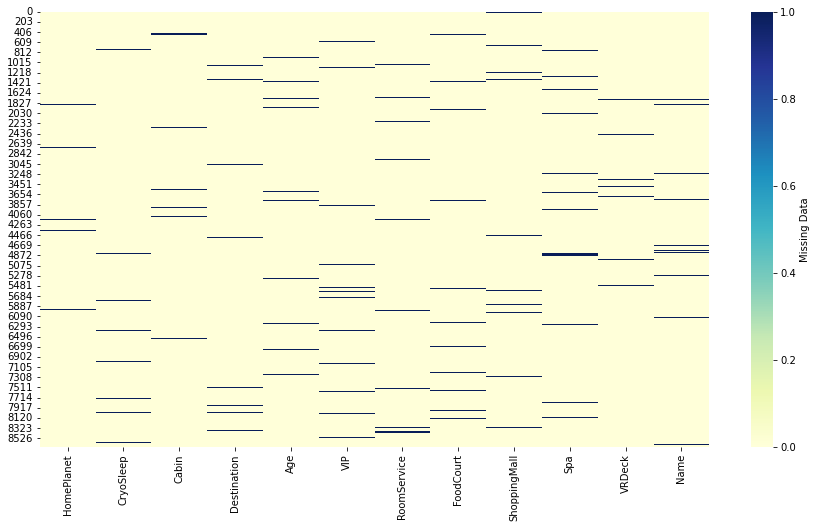

In [10]:
# Where are the NaN-values? All in same row or more distributed? 
plt.figure(figsize=(15,8)) # Do not use sns.set(...), this will change apperance of all plt plots!
nan_plot = sns.heatmap(train.drop(["PassengerId", "Transported"], axis=1).isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
#new_labels = nan_plot.set_xticklabels(nan_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

<AxesSubplot:>

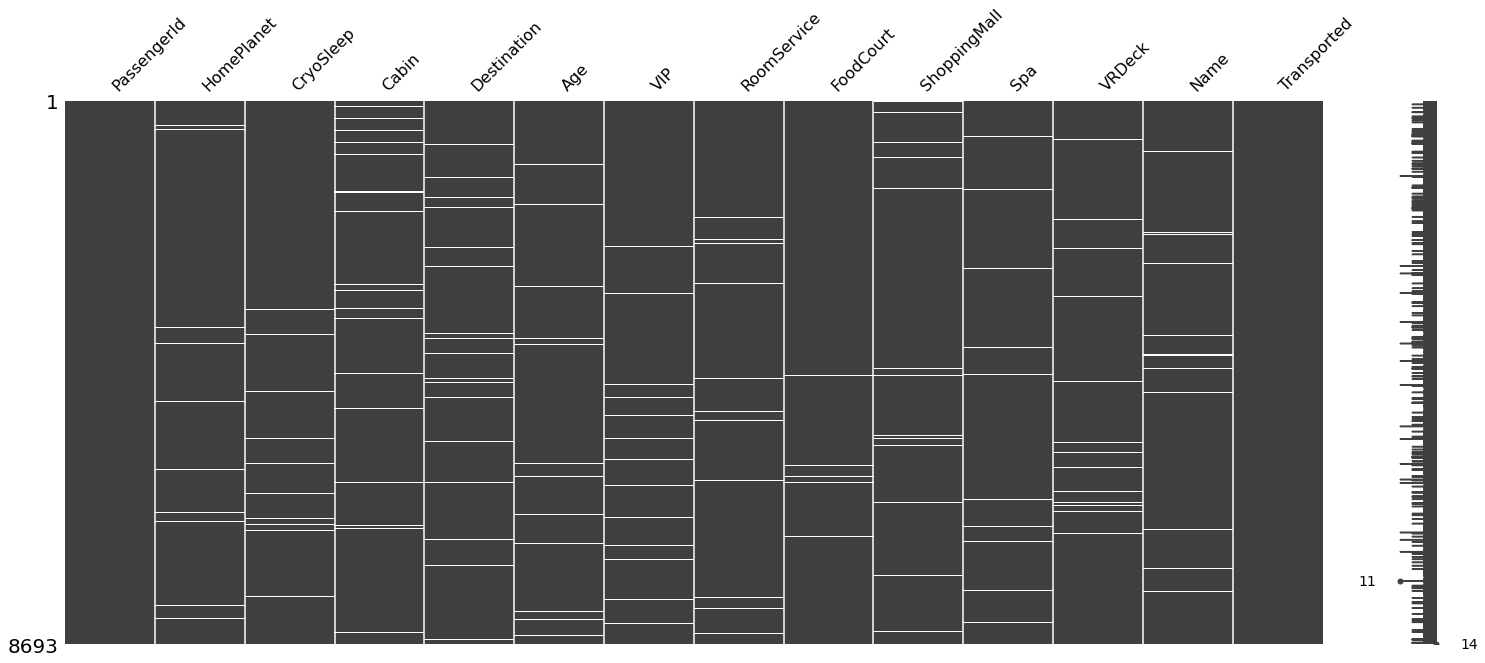

In [11]:
# Sns-heatmap was okay - but we want to search for pattern in NaN-position:
msno.matrix(train)

# We can see that there is a minimum of 11 non-NaN-values always present out of the 14 features
# so in one row a max of three values is missing.
# Most of them have all data (just a line, but not visible since too many), 
# many are missing one (first block), some are missing two (second block), very few are missing three (last block)

<AxesSubplot:>

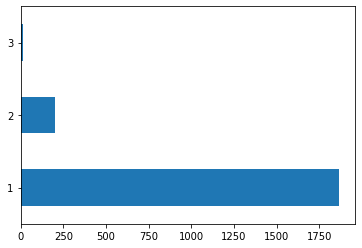

In [12]:
row_nans = train.drop(["PassengerId", "Transported"], axis=1).isnull().sum(axis=1)
row_nans[row_nans>0].value_counts().plot(kind="barh")

In [82]:
nan_corr.isna().corr()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Total_exp
HomePlanet,1.000000,-0.014804,0.007158,-0.001113,-0.011528,-0.008585,0.009729,-0.011897,0.010972,-0.006565,-0.017612,0.012128,-0.007495
CryoSleep,-0.014804,1.000000,0.010020,-0.002798,-0.018008,0.009436,-0.013004,-0.008055,0.013547,0.002218,0.011694,0.024627,0.003216
Cabin,0.007158,0.010020,1.000000,-0.000894,-0.000529,0.006891,-0.000773,0.004344,-0.013899,-0.011730,-0.001606,-0.013228,-0.009521
Destination,-0.001113,-0.002798,-0.000894,1.000000,-0.004230,-0.001331,-0.004443,0.012138,0.003392,-0.004653,-0.010694,-0.001004,-0.000027
Age,-0.011528,-0.018008,-0.000529,-0.004230,1.000000,0.009762,-0.015471,0.001308,-0.001500,-0.015620,0.000717,-0.006042,-0.012440
VIP,-0.008585,0.009436,0.006891,-0.001331,0.009762,1.000000,-0.001210,-0.001451,-0.004273,-0.012063,-0.017753,-0.018648,-0.015451
RoomService,0.009729,-0.013004,-0.000773,-0.004443,-0.015471,-0.001210,1.000000,-0.010160,-0.001744,-0.004548,-0.010603,-0.017004,0.426982
FoodCourt,-0.011897,-0.008055,0.004344,0.012138,0.001308,-0.001451,-0.010160,1.000000,-0.012473,0.006406,0.011251,0.004221,0.429385
ShoppingMall,0.010972,0.013547,-0.013899,0.003392,-0.001500,-0.004273,-0.001744,-0.012473,1.000000,-0.012473,0.007771,-0.003944,0.458450
Spa,-0.006565,0.002218,-0.011730,-0.004653,-0.015620,-0.012063,-0.004548,0.006406,-0.012473,1.000000,-0.005276,0.009566,0.429385


In [83]:
nan_corr[nan_corr.isna().any(1)]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Total_exp
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,NaN
10,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,NaN
15,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,908.0
16,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,NaN
23,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,NaN
8674,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,1148.0
8675,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,NaN
8684,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,0.0


<AxesSubplot:>

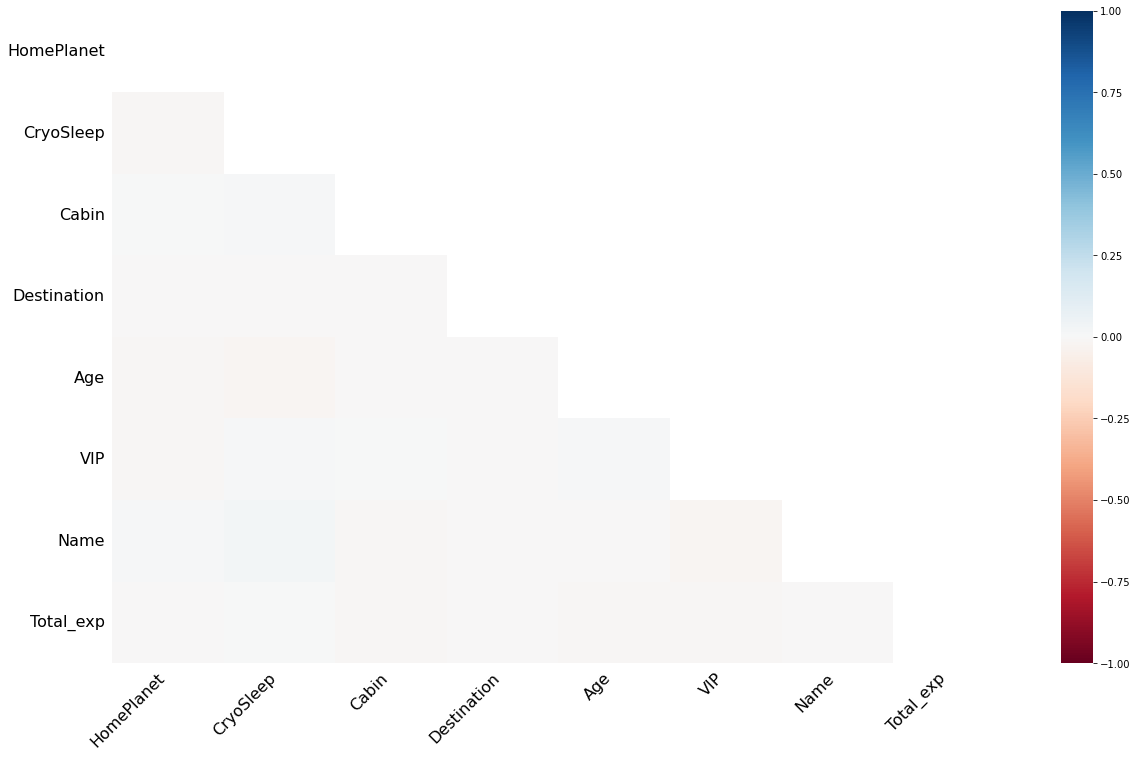

In [53]:
# Now look at NaNs in total_expenses instead of every one on their own (higher chance of seeing correlation):
nan_corr = train.drop(["PassengerId", "Transported"], axis=1)
nan_corr["Total_exp"] = train.iloc[:, [7,8,9,10,11]].sum(axis=1, skipna=False)

# Let's look at NaN-position-correlations:
# -1: If missing in this col, definetly not missing in other col
#  0: Absence of value has no correlation
#  1: If NaN in one column then definetly NaN in other column too 
msno.heatmap(nan_corr.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1))

# Interesting fact:
# The method just uses the correlation you can get with train.isna().corr()
# sns.heatmap(train.drop(["PassengerId", "Transported"], axis=1).isnull().corr(), vmin=-1, vmax=1, cmap="YlGnBu")

In [107]:
# Further interesting: The correlation coefficent is only very little influenced by more values 
# (so 1 different, 10 same similar to 1 different 1000 same)

n = 100
a = pd.DataFrame({"One":[False, True, True] + n*[True],
                 "Two":[True, False, False] + n*[True]})
print(a.var())
print(a.cov())
a.corr()

One    0.009709
Two    0.019227
dtype: float64
          One       Two
One  0.009709 -0.000190
Two -0.000190  0.019227


,One,Two
One,1.000000,-0.013933
Two,-0.013933,1.000000


In [108]:
# Here: We have higher variance for each of the features -> this increases the covariance

n = 50
a = pd.DataFrame({"One":[False, True, True] + n*[True] + n*[False],
                 "Two":[True, False, False] + n*[True] + n*[False]})
print(a.var())
print(a.cov())
a.corr()

One    0.252427
Two    0.252427
dtype: float64
          One       Two
One  0.252427  0.237769
Two  0.237769  0.252427


,One,Two
One,1.000000,0.941931
Two,0.941931,1.000000


HomePlanet     0.022590
CryoSleep      0.024342
Cabin          0.022371
Destination    0.020500
Age            0.020170
VIP            0.022809
Name           0.022480
Total_exp      0.093552
dtype: float64
HomePlanet     0.087077
CryoSleep      0.093210
Cabin          0.086301
Destination    0.079640
Age            0.078450
VIP            0.087850
Name           0.086689
Total_exp      0.245902
dtype: float64


<AxesSubplot:>

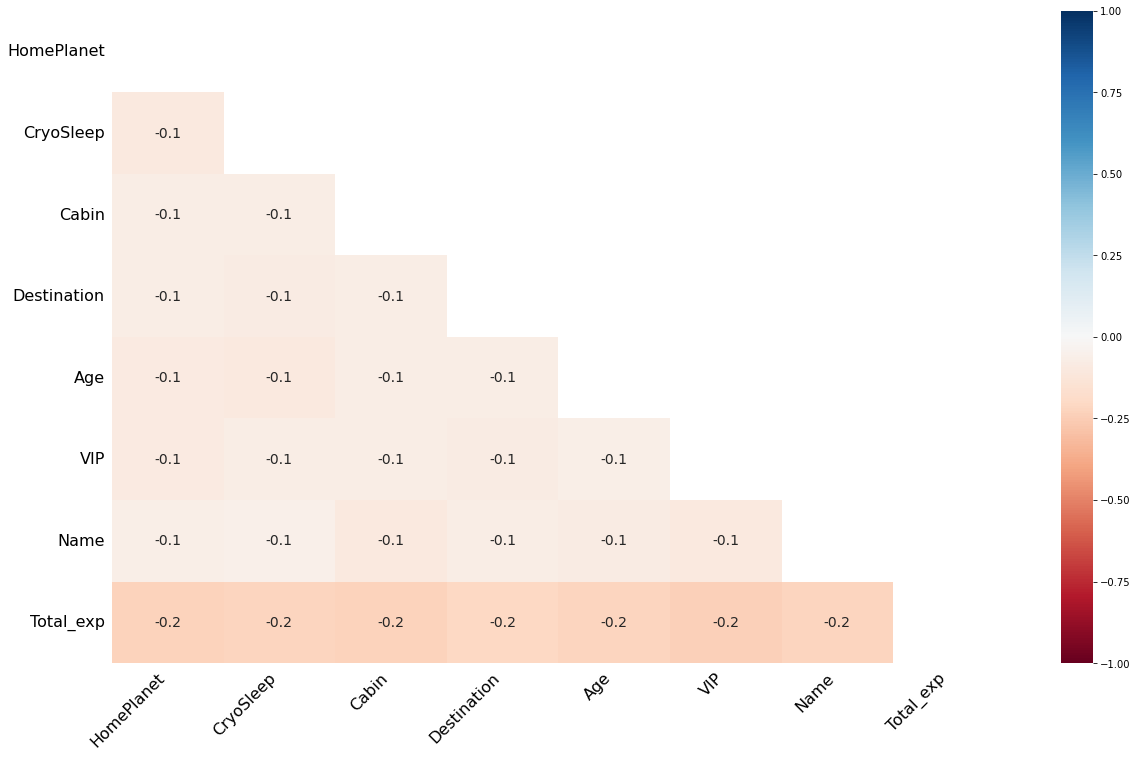

In [134]:
# So in this case where correlations are very low, it can make sense to exclude the rows with full data (so no NaNs)
# from the analysis, since they will decrease the variance (75% are full rows):
nan_corr = nan_corr.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
print(nan_corr.isna().var())
print(nan_corr[nan_corr.isna().any(1)].isna().var())

# This will not change anything regarding the relation of the correlations, just the magnitude is higher and 
# small realtions more obvious. Still only very little correlations
msno.heatmap(nan_corr[nan_corr.isna().any(1)])

**Findings of NaN-analysis:**
- PassengerId and Transported (target variable) have no missing values
- in general rows all have >= 11 values so <= 3 missing values in total, for the most part so deletion of rows does not make any sense
- there is no strong correlation between the occurence of missing values in different columns (so no systematic behind the distribution of missing values

### 2.3 Analyze each column and its influence on the target variable

#### 2.3.1 PassengerID 

In [14]:
print(f"The train dataset contains {len(train)} records of passengers.")

The train dataset contains 8693 records of passengers.


In [15]:
train.PassengerId.value_counts().max()

# Every PassengerID is unique

1

In [16]:
train.PassengerId

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

**Findings:** 
- Since there are 8693 passengers, and the ID starts from 1 and increases the count, some numbers have been skipped. Why? TO DO!
- What is the meaning of "_01" and "_02" in the end of the ID? Possible new feature? TO DO!

**Analyze the first part of number**

   n_occ  index
0      1   4805
1      2    841
2      3    340
3      4    103
4      5     53
5      6     29
6      7     33
7      8     13


<AxesSubplot:xlabel='n_occ'>

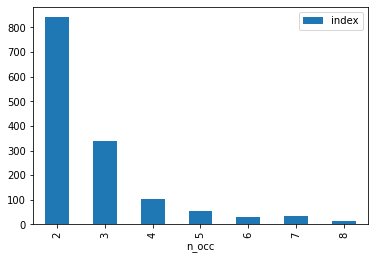

In [17]:
num_how_often = train.PassengerId.str.split("_", expand=True)[0].value_counts()

num_how_often = num_how_often.to_frame(name="n_occ").reset_index(level=0).groupby("n_occ").count().reset_index(level=0)

print(num_how_often)

num_how_often[(num_how_often.n_occ > 1)].plot(x="n_occ", y="index", kind="bar", legend=True)

**Analyze the second part of number**

In [18]:
train.PassengerId.str.split("_", expand=True)[1].value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: 1, dtype: int64

<AxesSubplot:xlabel='Ending number PassengerId'>

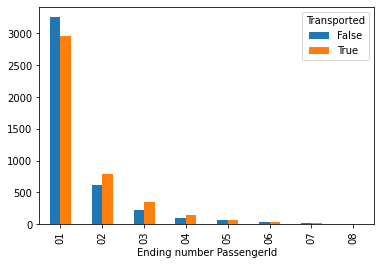

In [19]:
# Since it only consits of numbers from 1 to 8, we will transform this to a numeric or categorical new feature
# Maybe related to VIP status or special tickets?

# Check ratio of Transported/Not Transported for each ending number
end_num_trans = pd.concat([train.PassengerId.str.split("_", expand=True)[1], train.Transported], axis=1) \
                    .groupby(1) \
                    .value_counts("Transported") \
                    .reset_index() \
                    .pivot_table(index=1, columns="Transported", values=0) \
                    .transpose() 

end_num_trans.plot(kind="bar", xlabel="Ending number PassengerId")

# Only slight tendencies

**Decide on preprocessing of variable**

In [20]:
def preprocess_PassengerId(data):
    # Just return splitted column
    new_ID = data.PassengerId.str.split("_", expand=True)
    new_ID.columns = ["PassID_B", "PassID_E"]
    new_ID.PassID_E = new_ID.PassID_E.str[1]
    return new_ID

preprocess_PassengerId(train).head()

,PassID_B,PassID_E
0,0001,1
1,0002,1
2,0003,1
3,0003,2
4,0004,1


#### 2.3.2 HomePlanet

<AxesSubplot:title={'center':'Distribution of HomePlanet'}>

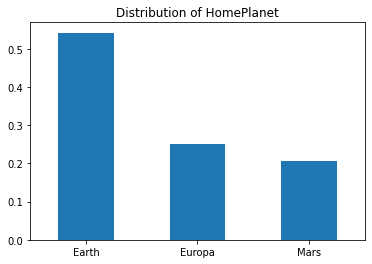

In [21]:
train.HomePlanet.value_counts(normalize=True).plot(kind="bar", rot=0, title="Distribution of HomePlanet")

<AxesSubplot:title={'center':'HomePlanet vs. Transported'}, xlabel='HomePlanet'>

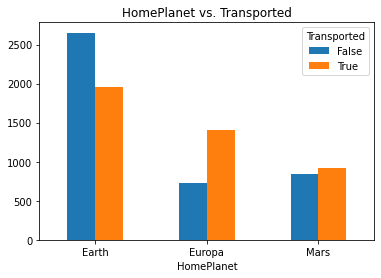

In [22]:
train[["HomePlanet", "Transported"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", 
                                                                                         rot=0, 
                                                                                         title="HomePlanet vs. Transported")

<AxesSubplot:title={'center':'HomePlanet vs. CryoSleep'}, xlabel='HomePlanet'>

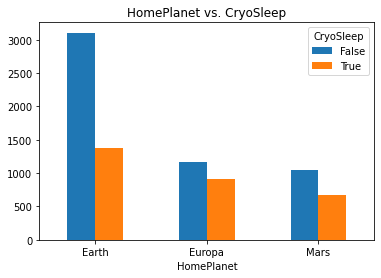

In [23]:
train[["HomePlanet", "CryoSleep"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", rot=0, title="HomePlanet vs. CryoSleep")

<AxesSubplot:title={'center':'HomePlanet vs. CryoSleep'}, xlabel='HomePlanet'>

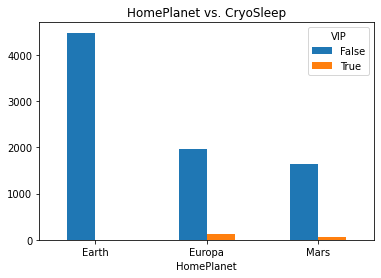

In [24]:
train[["HomePlanet", "VIP"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", rot=0, title="HomePlanet vs. CryoSleep")

In [25]:
hi = train.iloc[:, [1,2,7,8,9,10,11]]
hi[hi.CryoSleep==True]

,HomePlanet,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7,Earth,True,0.0,0.0,0.0,0.0,NaN
9,Europa,True,0.0,0.0,0.0,0.0,0.0
10,Europa,True,0.0,0.0,NaN,0.0,0.0
18,Mars,True,0.0,0.0,0.0,0.0,0.0
21,Earth,True,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8679,Europa,True,0.0,0.0,0.0,0.0,0.0
8680,Earth,True,0.0,0.0,0.0,0.0,0.0
8681,Earth,True,0.0,0.0,0.0,0.0,0.0
8684,NaN,True,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='HomePlanet', ylabel='Avg. expenses on board'>

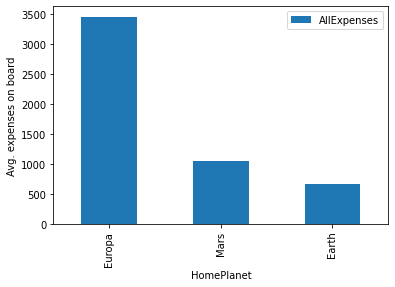

In [26]:
home_expenses = train.iloc[:, [1,7,8,9,10,11]]
all_expenses = home_expenses.iloc[:, 1:].sum(axis=1)

all_expenses_by_home = pd.concat([home_expenses.HomePlanet, all_expenses.rename("AllExpenses")], axis=1).groupby("HomePlanet").mean()

all_expenses_by_home.sort_values("AllExpenses", ascending=False).plot(kind="bar", ylabel="Avg. expenses on board")

CryoSleep    False  True
HomePlanet              
Earth        970.0   0.0
Europa      6189.0   0.0
Mars        1730.0   0.0


<AxesSubplot:ylabel='HomePlanet'>

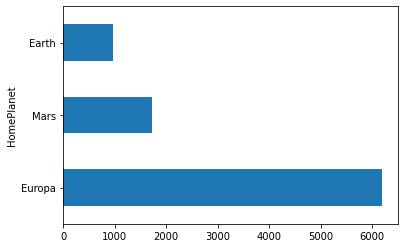

In [27]:
# Now we exclude the ones in CryoSleep because they cannot pay that much since they are bound to their cabin
expenses_home_cryo = pd.concat([train[["HomePlanet", "CryoSleep"]], all_expenses.rename("AllExpenses")], axis=1)

results_cryo_expenses = expenses_home_cryo.pivot_table(index="HomePlanet", columns="CryoSleep", values="AllExpenses", aggfunc="mean")
print(results_cryo_expenses.round())

# We can see that no expenses are done in CryoSleep! Now the averages for paying visitors are even higher:
results_cryo_expenses.iloc[:,0].sort_values(ascending=False).plot(kind="barh", rot=0)

**To-Do:**
- for each of the three home planets show distribution of some important features together with Trans/Not Trans in different colours in one plot (3 rows, 4 cols, each plot two groups) to identify different groups 
- for imputation of CryoSleep and vice versa: where expenses are 0 -> CryoSleep = 1, CryoSleep=1 -> expenses 0

In [28]:
cryo_expenses.CryoSleep.isnull().sum()
cryo_expenses[0].isnull().sum()

NameError: name 'cryo_expenses' is not defined

In [ ]:
cryo_expenses[cryo_expenses.CryoSleep.isnull()]

In [ ]:
cryo_expenses[cryo_expenses.isna().any(1)]

In [ ]:
# Compute all expense but keep NaN if one is NaN
all_expenses_NaN = home_expenses.iloc[:, 1:].sum(axis=1, skipna=False)
cryo_expenses = pd.concat([train.CryoSleep, all_expenses_NaN], axis=1)

print(len(cryo_expenses[cryo_expenses.isna().any(1)])) # Total where one or both are NaN
print(cryo_expenses[cryo_expenses.CryoSleep.isna() &  ~cryo_expenses[0].isna()].shape[0]) # Can be 100% resolved
print(cryo_expenses[cryo_expenses[0].isna() &  cryo_expenses.CryoSleep==True].shape[0]) # Can be 100% resolved

In [ ]:
# TO-DO: Do it in nicer way!
hi = train.iloc[:, [1,2,7,8,9,10,11]].copy()
hi[hi.CryoSleep==True]

In [ ]:
hi["Total_exp"] = hi.iloc[:, 2:].sum(axis=1, skipna=False)
nan_expenses = hi[hi.Total_exp.isna()]
nan_expenses[nan_expenses.CryoSleep == True] # CryoSleep + NaN in expenses? - 347 rows: just fill in 0 for each expense

# NaN CryoSleep + Expenses not NaN: -> True is ==0, False if >0
# NaN CryoSleep + Expenses NaN:  1) only zeros other than NaN? -> CryoSleep=True, RestExp=0
#                                2) at least one value >0? -> CryoSleep=False, RestExp=mean of HomePlanet (TO-DO)
nan_expenses[nan_expenses.CryoSleep.isna()]

#### 2.3.3 CryoSleep

#### 2.3.4 Cabin

#### 2.3.5 Destination

#### 2.3.6 Age

#### 2.3.7 VIP

#### 2.3.8 RoomService

#### 2.3.9. FoodCourt

#### 2.3.10 ShoppingMall

#### 2.3.11 Spa

#### 2.3.12 VRDeck

#### 2.3.13 Name

#### 2.3.14 Transported - Target Variable

## 3. Preprocess the data

## 4. Engineer models and predict target variable